# Data visualizations pre proccess methods

In [7]:
from PIL import Image
import rawpy
from scipy.signal import convolve2d
import imageio
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load image paths at once
img_paths = ["/Users/ishaanbabbar/DSAN-6500/code_TL/images/TCGA-A1-A0SK-01Z-00-DX1.A44D70FA-4D96-43F4-9DD7-A61535786297_[22877, 12530, 24892, 13993].png",
"/Users/ishaanbabbar/DSAN-6500/code_TL/images/TCGA-A1-A0SP-01Z-00-DX1.20D689C6-EFA5-4694-BE76-24475A89ACC0_[3401, 26862, 6276, 28896].png",
"/Users/ishaanbabbar/DSAN-6500/code_TL/images/TCGA-A2-A0CM-01Z-00-DX1.AC4901DE-4B6D-4185-BB9F-156033839828_[9283, 28428, 11819, 30374].png",
      ]

images = [cv2.imread(img_path) for img_path in img_paths]

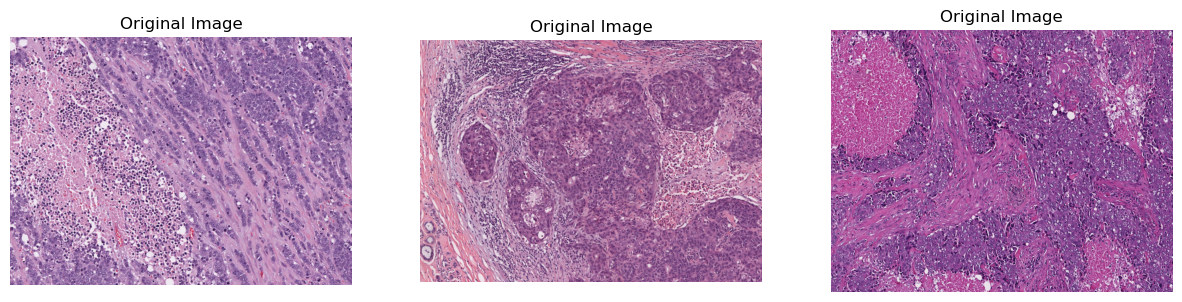

In [34]:
plt.figure(figsize = (15,5))
for i, img in enumerate(images):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
plt.show()

## Method 1: Transformations 

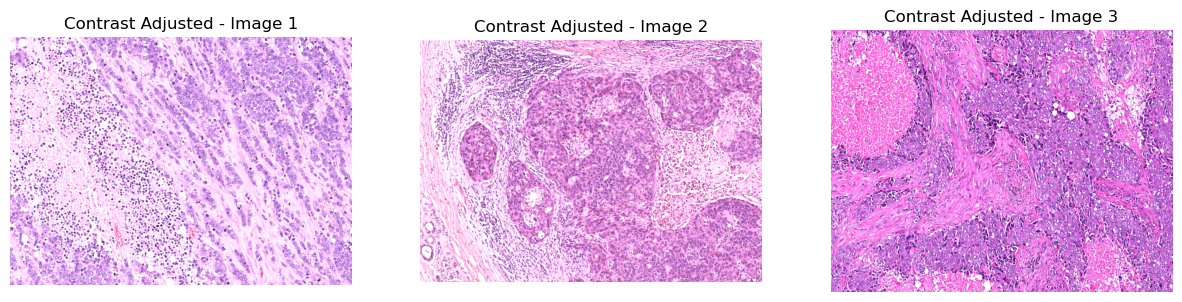

In [55]:
# Contrast adjustments 
def adjust_contrast(image, alpha = 1.5, beta = 0):
    return cv2.convertScaleAbs(image, alpha = alpha, beta =beta)

img_contrast = [adjust_contrast(image) for image in images]

titles = [
    'Contrast Adjusted - Image 1',
    'Contrast Adjusted - Image 2',
    'Contrast Adjusted - Image 3'
]

plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(img_contrast, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('ContrastAdjusted.jpg')

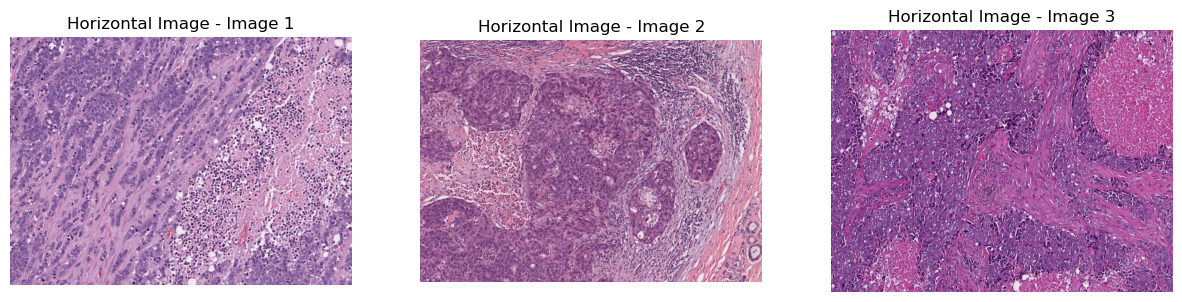

In [58]:
# Flipping image 
img_horiz = [cv2.flip(image, 1) for image in images]
img_vert = [cv2.flip(image, 0) for image in images]


titles = [
    'Horizontal Image - Image 1',
    'Horizontal Image - Image 2',
    'Horizontal Image - Image 3'
]


titles1 = [
    'Vertical Image - Image 1',
    'Vertical Image - Image 2',
    'Vertical Image - Image 3'
]

# display Horizontal image
plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(img_horiz, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('HorizontalImage.jpg')

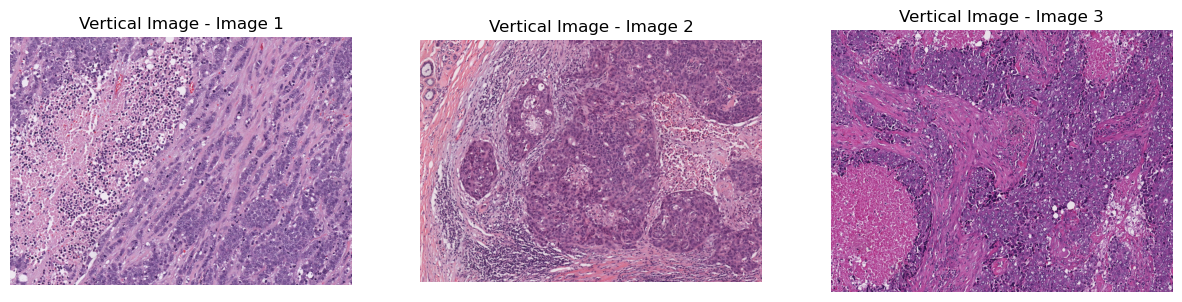

In [59]:
# Display Vertical image
plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(img_vert, titles1)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('VerticalImage.jpg')

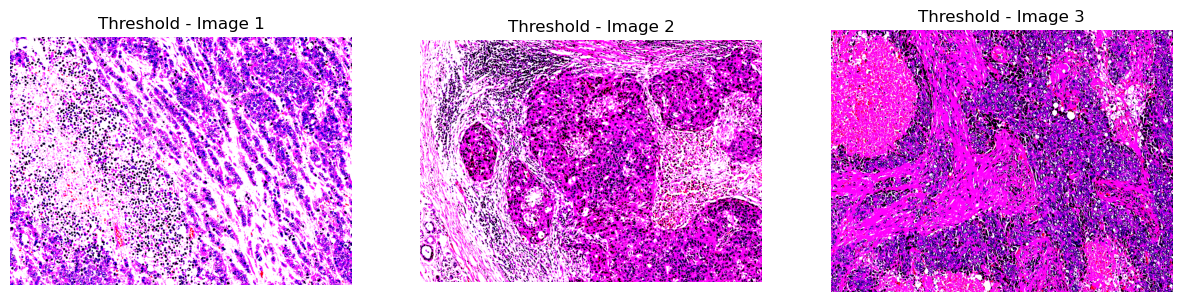

In [60]:
# Create threshold 

img_threshold = [cv2.threshold(image, 127, 255,cv2.THRESH_BINARY)[1] for image in images ]

titles = [
    'Threshold - Image 1',
    'Threshold - Image 2',
    'Threshold - Image 3'
]

plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(img_threshold, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('Thresholds.jpg')

# Method 2: Color Spacing

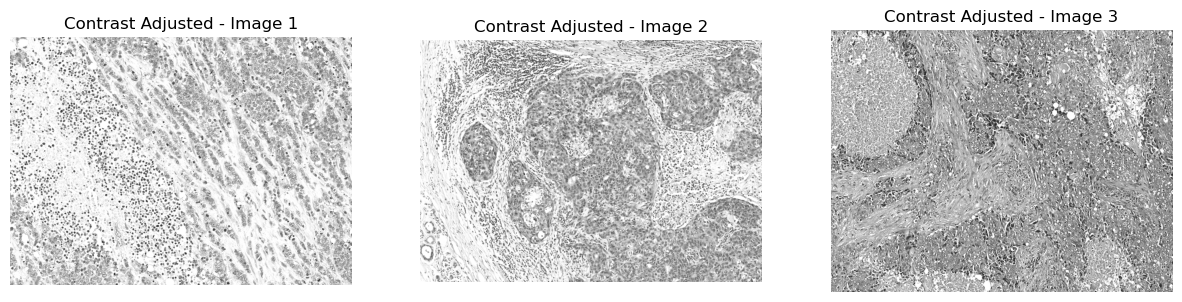

In [61]:
# Change color to gray and compare threshold and Contrast 

img_gray = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

# Create Contrast adjustment with gray image
def adjust_contrast(image, alpha = 1.5, beta = 0):
    return cv2.convertScaleAbs(image, alpha = alpha, beta =beta)

img_contrast_gray = [adjust_contrast(image) for image in img_gray]

titles = [
    'Contrast Adjusted - Image 1',
    'Contrast Adjusted - Image 2',
    'Contrast Adjusted - Image 3'
]

plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(img_contrast_gray, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('ContrastAdjusted-grayspace.jpg')

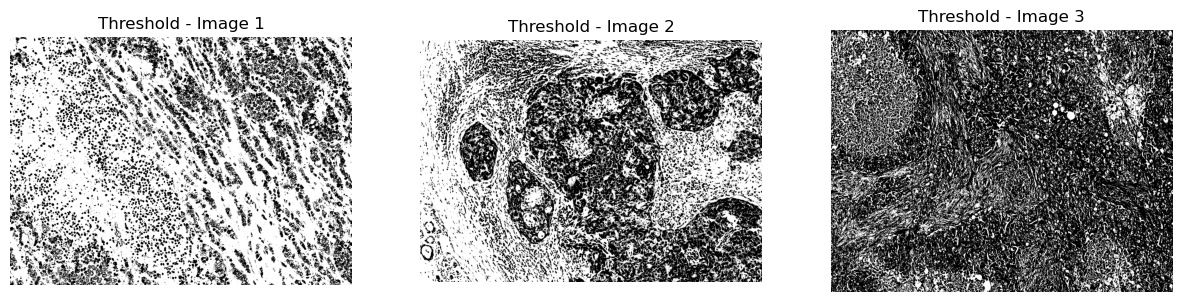

In [62]:
# Compare now with threshold with gray image

img_threshold = [cv2.threshold(image, 127, 255,cv2.THRESH_BINARY)[1] for image in img_gray ]

titles = [
    'Threshold - Image 1',
    'Threshold - Image 2',
    'Threshold - Image 3'
]

plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(img_threshold, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('Threshold-grayspace.jpg')

# Method 3: Warping

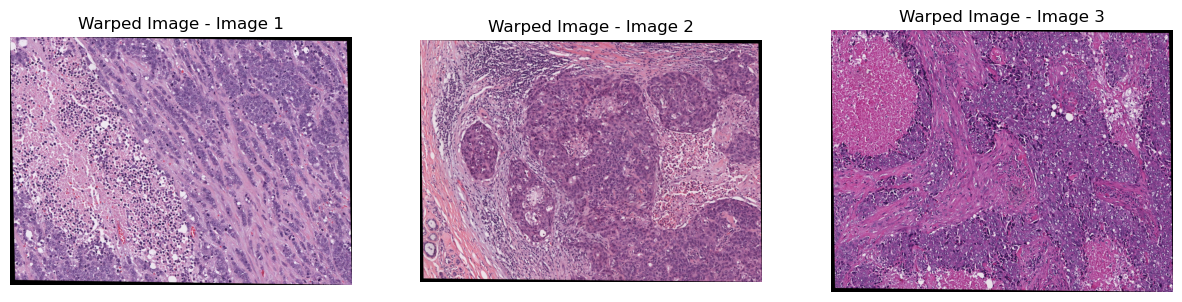

In [63]:
# Apply warping to show distortions 
def warp_image(image):
    h, w= image.shape[:2]
    pts1 = np.float32([[0,0], [w, 0], [0, h], [w, h]])
    pts2 = np.float32([[0,0], [w-30, 30], [30, h-30], [w, h]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    return cv2.warpPerspective(image, matrix, (w,h))
    
image_warped = [warp_image(image) for image in images]

titles = [
    'Warped Image - Image 1',
    'Warped Image - Image 2',
    'Warped Image - Image 3'
]

plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(image_warped, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('WarpedImage.jpg')

# Method 4: Cropping

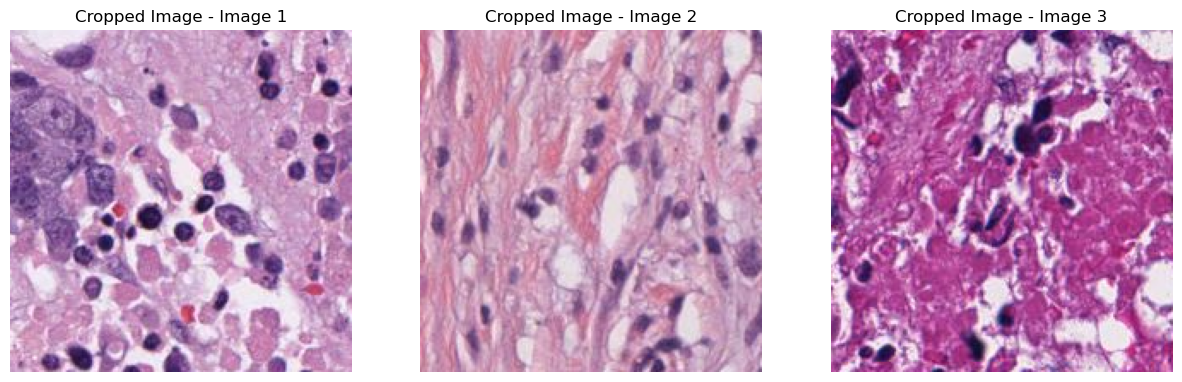

In [64]:
# Create crop function to crop a specific region in the images
def crop_image(image,x,y, w,h):
    return image[y:y +h, x:x+w]

# Specify cropping parameters chosen (Can adjust this)
images_cropped = [crop_image(image, 50, 50, 200, 200) for image in images]

titles = [
    'Cropped Image - Image 1',
    'Cropped Image - Image 2',
    'Cropped Image - Image 3'
]

plt.figure(figsize = (15,5))
for i, (img, title) in enumerate(zip(images_cropped, titles)):
    plt.subplot(1, 3, i +1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.savefig('Cropped.jpg')